In [145]:
import pandas as pd
import re
import numpy as np

In [146]:
tweet_data1 = pd.read_csv("covid_tweets_30Days_full_text.csv", 
                         header=None, 
                         names = ["Date", "Type", "Text", "Location"])

In [147]:
tweet_data1.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,RT @smallpencilclub: and if ya wanna put all y...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And @POTUS wants to give you #coronavirus #MAG...,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,RT @cindievaccaro: Shocker. The government lie...,NaN
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19: Updates for the US #covid19 https://...,NaN
4,Fri Jun 12 03:38:54 +0000 2020,Original,#COVID19 in the #NavajoNation is out of contro...,"Elkins Park, PA"


In [148]:
len(tweet_data1)

15000

### use this curl command to generate Bearer token
curl -u 'MtHkdCRcsI4GN2PMQfHYjxEZE:h6LTARw0c2p2OhWmi0wJKlWWw0ml8xMnhdLvLmWBMLpoyrAVra'   --data 'grant_type=client_credentials' 'https://api.twitter.com/oauth2/token'

In [149]:
tweet_data1.loc[10,'Text']

'Because of #COVID19, @dukeraleigh social worker Jill Galuten can’t see patients face to face. \n\nSo now she uses a robot to help her make her rounds. She controls it from her keyboard, while sitting at home.\n\nSTORY: https://t.co/QBJAgOV4Ax'

In [150]:
tweet_data2 = pd.read_csv("scraped_covid_tweets_full.csv", 
                         header=None, 
                         names = ["Date", "Type", "Text", "Location"])

In [151]:
tweet_data2.head()

,Date,Type,Text,Location
0,Thu Feb 27 23:59:06 +0000 2020,Original,Italian airports checking for #CoronaVirus htt...,"Houston, TX"
1,Thu Feb 27 23:58:33 +0000 2020,Original,I think Station Eleven by Emily St John Mandel...,Sherwood Forest 🌳🌲🌿
2,Thu Feb 27 23:57:43 +0000 2020,Retweet,Important. ⬇️ #COVID19 https://t.co/PoOdIm8PsQ,"Boston, MA"
3,Thu Feb 27 23:57:06 +0000 2020,Original,"How the hell are corporations, all of a sudden...",Nomadic
4,Thu Feb 27 23:56:55 +0000 2020,Original,#UPDATE: There’s one person in quarantine insi...,"Seattle, WA"


In [152]:
len(tweet_data2)

13267

In [153]:
tweet_data3 = pd.read_csv("scraped_covid_tweets_full_2.csv", 
                         header=None, 
                         names = ["Date", "Type", "Text", "Location"])

### Concatenate the three dataframe into one

In [154]:
covid_tweets = pd.concat([tweet_data1, tweet_data2, tweet_data3], sort=False, ignore_index=True)

In [155]:
covid_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,RT @smallpencilclub: and if ya wanna put all y...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And @POTUS wants to give you #coronavirus #MAG...,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,RT @cindievaccaro: Shocker. The government lie...,NaN
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19: Updates for the US #covid19 https://...,NaN
4,Fri Jun 12 03:38:54 +0000 2020,Original,#COVID19 in the #NavajoNation is out of contro...,"Elkins Park, PA"


In [156]:

len(covid_tweets)

41367

In [157]:
old_tweets = covid_tweets.copy()

In [158]:

def cleanTweet(tweet):
    # process the tweets

    #Convert to lower case
    #tweet = tweet.lower()
    
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    
    #Convert @username to AT_USER
    #tweet = re.sub('@[^\s]+','AT_USER',tweet)
    
    #Replace @username with username
    tweet = re.sub(r'@([^\s]+)', r'\1', tweet)
    
   
    #Replace #word with word
    #tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Remove #word 
    tweet = re.sub(r'#([^\s]+)', '' , tweet)
    
    # Replace 3dots with one
    tweet = re.sub(r'[...]', '.', tweet)
    
    # remove astericks
    tweet = re.sub(r'[\*]', '', tweet)
    
    # Replace : with space
    tweet = re.sub(r'[:]', ' ', tweet)
    
    # Remove RT from retweet
    tweet = re.sub(r'RT', '', tweet)
    
    # trim
    tweet = tweet.strip('\'"')
    
    # Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    
    
    tweet = tweet.strip()
    
    
    
    return tweet  


In [159]:
def removeEmoji(text):
    if not text:
        return ''
    return text.encode('ascii', 'ignore').decode('ascii')

In [160]:
covid_tweets.Location.fillna('', inplace=True)

In [161]:
covid_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,RT @smallpencilclub: and if ya wanna put all y...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And @POTUS wants to give you #coronavirus #MAG...,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,RT @cindievaccaro: Shocker. The government lie...,
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19: Updates for the US #covid19 https://...,
4,Fri Jun 12 03:38:54 +0000 2020,Original,#COVID19 in the #NavajoNation is out of contro...,"Elkins Park, PA"


### Apply Data cleaning to the tweet's text and location data

In [162]:
covid_tweets['Text'] = covid_tweets['Text'].apply(removeEmoji).apply(cleanTweet)

In [163]:
covid_tweets['Location'] = covid_tweets['Location'].apply(removeEmoji)

In [164]:
covid_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,smallpencilclub and if ya wanna put all your e...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And POTUS wants to give you,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,"cindievaccaro Shocker. The government lied. ""W...",
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19 Updates for the US,
4,Fri Jun 12 03:38:54 +0000 2020,Original,in the is out of control and this government i...,"Elkins Park, PA"


In [165]:
tweet_data2.Location.fillna('', inplace=True)

In [166]:
tweet_data2.head()

,Date,Type,Text,Location
0,Thu Feb 27 23:59:06 +0000 2020,Original,Italian airports checking for #CoronaVirus htt...,"Houston, TX"
1,Thu Feb 27 23:58:33 +0000 2020,Original,I think Station Eleven by Emily St John Mandel...,Sherwood Forest 🌳🌲🌿
2,Thu Feb 27 23:57:43 +0000 2020,Retweet,Important. ⬇️ #COVID19 https://t.co/PoOdIm8PsQ,"Boston, MA"
3,Thu Feb 27 23:57:06 +0000 2020,Original,"How the hell are corporations, all of a sudden...",Nomadic
4,Thu Feb 27 23:56:55 +0000 2020,Original,#UPDATE: There’s one person in quarantine insi...,"Seattle, WA"


In [167]:
tweet_data2.Location = tweet_data2.Location.apply(removeEmoji)

In [168]:
tweet_data2.head()

,Date,Type,Text,Location
0,Thu Feb 27 23:59:06 +0000 2020,Original,Italian airports checking for #CoronaVirus htt...,"Houston, TX"
1,Thu Feb 27 23:58:33 +0000 2020,Original,I think Station Eleven by Emily St John Mandel...,Sherwood Forest
2,Thu Feb 27 23:57:43 +0000 2020,Retweet,Important. ⬇️ #COVID19 https://t.co/PoOdIm8PsQ,"Boston, MA"
3,Thu Feb 27 23:57:06 +0000 2020,Original,"How the hell are corporations, all of a sudden...",Nomadic
4,Thu Feb 27 23:56:55 +0000 2020,Original,#UPDATE: There’s one person in quarantine insi...,"Seattle, WA"


In [169]:
covid_tweets.Location = covid_tweets.Location.apply(removeEmoji)

In [170]:
covid_tweets.Text = covid_tweets.Text.apply(removeEmoji)

In [171]:
covid_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,smallpencilclub and if ya wanna put all your e...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And POTUS wants to give you,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,"cindievaccaro Shocker. The government lied. ""W...",
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19 Updates for the US,
4,Fri Jun 12 03:38:54 +0000 2020,Original,in the is out of control and this government i...,"Elkins Park, PA"


In [172]:
covid_tweets.Text = covid_tweets.Text.apply(cleanTweet)

In [173]:
covid_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,smallpencilclub and if ya wanna put all your e...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And POTUS wants to give you,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,"cindievaccaro Shocker. The government lied. ""W...",
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19 Updates for the US,
4,Fri Jun 12 03:38:54 +0000 2020,Original,in the is out of control and this government i...,"Elkins Park, PA"


In [174]:
# counting original tweets vs retweets    
covid_tweets['Type'].value_counts()

Original    26180
Retweet     15187
Name: Type, dtype: int64

In [175]:
# counting tweets that has a location    
len(covid_tweets[covid_tweets['Location'] != ''])

36033

In [176]:
covid_tweets = covid_tweets[covid_tweets['Type'] == 'Original']

In [177]:
len(covid_tweets)

26180

### Converts the Date Column from string to datetime

In [178]:
from datetime import datetime

In [179]:
covid_tweets.Date = pd.to_datetime(covid_tweets["Date"])

In [180]:
covid_tweets.head()

,Date,Type,Text,Location
1,2020-06-12 03:41:17,Original,And POTUS wants to give you,"San Diego, CA"
3,2020-06-12 03:39:44,Original,COVID-19 Updates for the US,
4,2020-06-12 03:38:54,Original,in the is out of control and this government i...,"Elkins Park, PA"
10,2020-06-12 03:36:57,Original,Because of dukeraleigh social worker Jill Galu...,"Durham, NC"
12,2020-06-12 03:35:26,Original,.ASMGlobalLive Have you seen this? Do you real...,Sonoma county


### Make a copy of the dataframe and make Date column the index

In [181]:
all_covid_tweets = covid_tweets.copy()

In [182]:
all_covid_tweets.set_index('Date',inplace=True)

In [183]:
all_covid_tweets.sort_index(inplace=True)

In [184]:
all_covid_tweets.head()

,Type,Text,Location
Date,,,
2020-01-22 01:54:44,Original,The US has reported its first case of the dead...,The Bronx
2020-01-22 01:56:05,Original,Too bad this isnt from Mexico,"Columbus, OH"
2020-01-22 01:58:40,Original,live.,SJ | NYC | Roma | Providence
2020-01-22 02:00:14,Original,Well it's time to protect ourselves please was...,"California, USA"
2020-01-22 02:07:10,Original,Bartender What would you like to drink? Me How...,"Frankfurt on the Main, Germany"


In [185]:
len(all_covid_tweets)

26180

### Select a Date range from May to June 

In [705]:
month = 'June'
start_date = '2020-06-01'
end_date = '2020-06-30'

In [706]:
covid_tweets = all_covid_tweets.loc[start_date:end_date].copy()

In [707]:
len(covid_tweets)

4539

In [708]:
covid_tweets.head(20)

,Type,Text,Location
Date,,,
2020-06-07 16:56:27,Original,This is not acceptable! AmericanAir has my hus...,
2020-06-07 16:56:28,Original,You're correct!!! None at Santa Fe Station eit...,Las Vegas
2020-06-07 16:56:52,Original,The convergence of has caught the attention of...,"Atlanta, GA"
2020-06-07 16:57:39,Original,WellbeingAlter1 Ginger215 G4474Denise Shashank...,"Philadelphia, PA"
2020-06-07 16:59:12,Original,Excited to join this incredible panel hosted b...,"Boynton Beach, FL"
2020-06-07 16:59:43,Original,not__bobby HRivera72964164 crushed them. Same ...,
2020-06-07 17:00:13,Original,Religious gatherings can resume. Let's pray an...,United States
2020-06-07 17:03:21,Original,We have time to really protest it now thanks t...,"Washington, DC"
2020-06-07 17:07:15,Original,Under the leadership of as chair to the g20org...,"New York, NY"


### Reset the index to int

In [709]:
covid_tweets.reset_index(inplace=True)

In [710]:
covid_tweets.head()

,Date,Type,Text,Location
0,2020-06-07 16:56:27,Original,This is not acceptable! AmericanAir has my hus...,
1,2020-06-07 16:56:28,Original,You're correct!!! None at Santa Fe Station eit...,Las Vegas
2,2020-06-07 16:56:52,Original,The convergence of has caught the attention of...,"Atlanta, GA"
3,2020-06-07 16:57:39,Original,WellbeingAlter1 Ginger215 G4474Denise Shashank...,"Philadelphia, PA"
4,2020-06-07 16:59:12,Original,Excited to join this incredible panel hosted b...,"Boynton Beach, FL"


### Remove duplicate tweets by Date

In [711]:
covid_tweets.drop_duplicates(subset=['Date'], inplace=True)

In [712]:
covid_tweets.head()

,Date,Type,Text,Location
0,2020-06-07 16:56:27,Original,This is not acceptable! AmericanAir has my hus...,
1,2020-06-07 16:56:28,Original,You're correct!!! None at Santa Fe Station eit...,Las Vegas
2,2020-06-07 16:56:52,Original,The convergence of has caught the attention of...,"Atlanta, GA"
3,2020-06-07 16:57:39,Original,WellbeingAlter1 Ginger215 G4474Denise Shashank...,"Philadelphia, PA"
4,2020-06-07 16:59:12,Original,Excited to join this incredible panel hosted b...,"Boynton Beach, FL"


In [713]:
len(covid_tweets)

4491

In [714]:
covid_tweets.reset_index(drop=True,inplace=True)

In [715]:
covid_tweets.head()

,Date,Type,Text,Location
0,2020-06-07 16:56:27,Original,This is not acceptable! AmericanAir has my hus...,
1,2020-06-07 16:56:28,Original,You're correct!!! None at Santa Fe Station eit...,Las Vegas
2,2020-06-07 16:56:52,Original,The convergence of has caught the attention of...,"Atlanta, GA"
3,2020-06-07 16:57:39,Original,WellbeingAlter1 Ginger215 G4474Denise Shashank...,"Philadelphia, PA"
4,2020-06-07 16:59:12,Original,Excited to join this incredible panel hosted b...,"Boynton Beach, FL"


In [716]:
tweets_len = []
for index, row in covid_tweets.iterrows():
    tweets_len.append((index, len(row.Text)))

In [717]:
tweets_len[0:10]

[(0, 184),
 (1, 132),
 (2, 203),
 (3, 382),
 (4, 245),
 (5, 112),
 (6, 82),
 (7, 78),
 (8, 240),
 (9, 99)]

In [718]:
#tweets_len.sort(key=lambda x: (x[0],x[1]), reverse=True)
#re_tweets_len = sorted(tweets_len, key=lambda x: (x[0],-x[1]))

In [719]:
# get tweets that are below 70 characters long
count = 0
indices = []
above280 = []
for index, value in tweets_len:
    if value < 20:
        indices.append(index)
        count +=1
#     if value > 280:
#         above280.append(index)
#         count +=1

In [720]:
count

137

In [721]:
covid_tweets.shape

(4491, 4)

In [722]:
covid_tweets.drop(indices, inplace=True)

In [723]:
covid_tweets.shape

(4354, 4)

In [724]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

### get all word (i.e token) from each tweet

In [725]:
all_words = ''
for index, row in covid_tweets.iterrows():
    tokens = row.Text.lower().split()
    
    all_words += ' '.join(tokens)
   

In [726]:
len(all_words)

608656

In [727]:
type(STOPWORDS)

set

In [728]:
additional_stopwords = ['coronavirus', 'covid19', 'ha', 'the', 'thi', 'was','still','going', 
                   'is','hi', 'Covid19', 'Covid-19','will', 'dont', 'call', 'see', 'will',
                       'can','stop','said', 'could','say', 'says', 'may', 'might', 'must', 'would', 'should',]
stopwords = list(STOPWORDS) + additional_stopwords
stopwords = set(stopwords)
wordcloud = WordCloud(width=800, 
                      height=800,
                      stopwords=stopwords,
                      max_words=80,
                      background_color='white', 
                      min_font_size=10).generate(all_words)


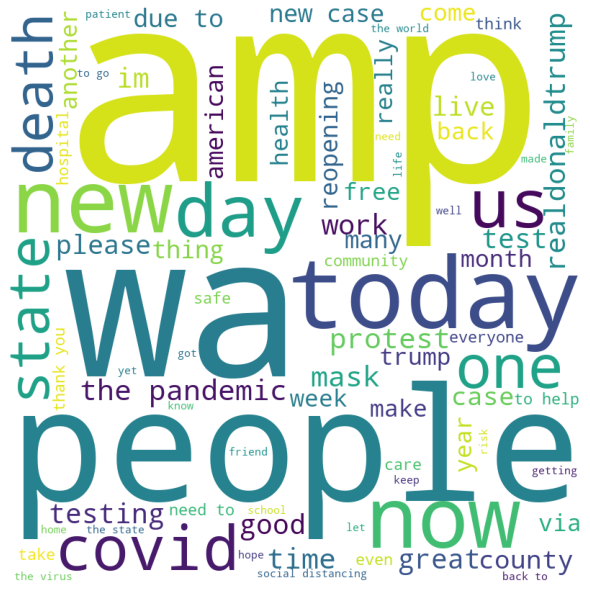

In [729]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [730]:
from collections import defaultdict


In [731]:
stops = defaultdict(bool)
for stopword in stopwords:
    stops[stopword] = True

In [732]:
stops['will']

True

### Perform a word count and further cleaning of the tweet's text

In [733]:
word_count = defaultdict(int)
for word in all_words.split():
    word  = re.sub(r'[@_!#$%^&*().<>?/\|}{~:]', '', word).strip() # remove special characters
    if stops[word] or len(word) < 3: #remove missed character and some stop words
        continue
        
    if word_count[word]:
        word_count[word] += 1
    else:
        word_count[word] = 1

In [734]:
len(word_count)

17919

In [735]:
sorted_word_count = sorted(word_count.items(), key = lambda x: x[1])

In [736]:
len(sorted_word_count)

17919

In [737]:
sorted_word_count[-10:]

[('today', 177),
 ('back', 181),
 ('pandemic', 183),
 ('time', 197),
 ('one', 203),
 ('now', 249),
 ('people', 348),
 ('cases', 352),
 ('new', 366),
 ('amp;', 677)]

### word count to filter out words that contains special characters or numbers

In [738]:
#regex = re.compile('[@_!#$%^&*().<>?/\|}{~:]') 
#regex = re.compile('[a-zA-Z]')
#if regex.search(key):

new_word_count = []       
for tp in sorted_word_count[-300:]:
    key, value = tp
    if key.isalpha():
        new_word_count.append(tp)

In [739]:
new_word_count[-10:]

[('day', 160),
 ('today', 177),
 ('back', 181),
 ('pandemic', 183),
 ('time', 197),
 ('one', 203),
 ('now', 249),
 ('people', 348),
 ('cases', 352),
 ('new', 366)]

In [740]:
len(new_word_count)

297

In [741]:
wd = dict(new_word_count)

In [742]:
wd

{'future': 25,
 'shut': 25,
 'office': 25,
 'left': 26,
 'critical': 26,
 'yesterday': 26,
 'bad': 26,
 'full': 26,
 'guess': 26,
 'recovery': 26,
 'reporting': 26,
 'anything': 26,
 'system': 26,
 'return': 26,
 'change': 26,
 'wants': 26,
 'talking': 26,
 'always': 27,
 'started': 27,
 'able': 27,
 'update': 27,
 'person': 27,
 'shows': 27,
 'years': 27,
 'lost': 27,
 'communities': 27,
 'early': 27,
 'center': 27,
 'yall': 27,
 'hospitals': 27,
 'capacity': 27,
 'job': 27,
 'possible': 27,
 'families': 27,
 'members': 28,
 'bring': 28,
 'month': 28,
 'gonna': 28,
 'means': 28,
 'follow': 29,
 'especially': 29,
 'spreading': 29,
 'racism': 29,
 'tonight': 29,
 'mean': 29,
 'put': 30,
 'american': 30,
 'someone': 30,
 'taking': 30,
 'plan': 30,
 'talk': 30,
 'something': 30,
 'active': 30,
 'man': 30,
 'share': 30,
 'seems': 30,
 'friend': 30,
 'ill': 30,
 'wait': 30,
 'symptoms': 30,
 'least': 31,
 'forward': 31,
 'doesnt': 31,
 'information': 31,
 'real': 31,
 'die': 31,
 'done': 31

In [743]:
# here we use the word dictionary wd, because this is supported by generate_from_frequencies
wordcloud2 = WordCloud(width=800, 
                      height=800,
                      max_words=200,
                      background_color='white', 
                      min_font_size=10).generate_from_frequencies(wd)

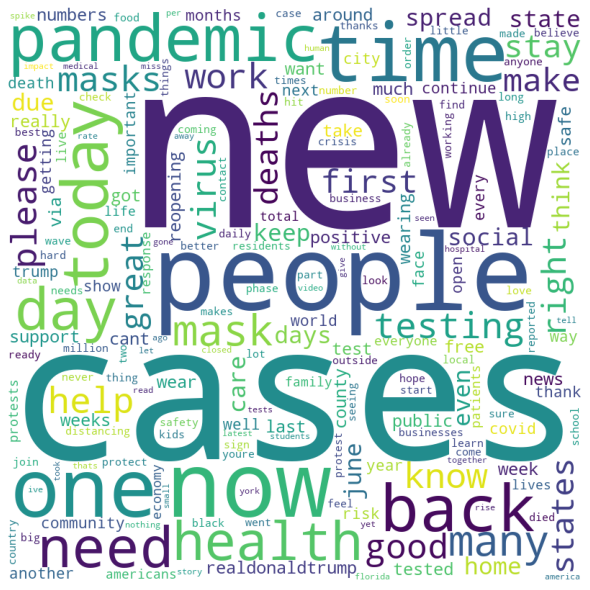

In [744]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<BarContainer object of 40 artists>

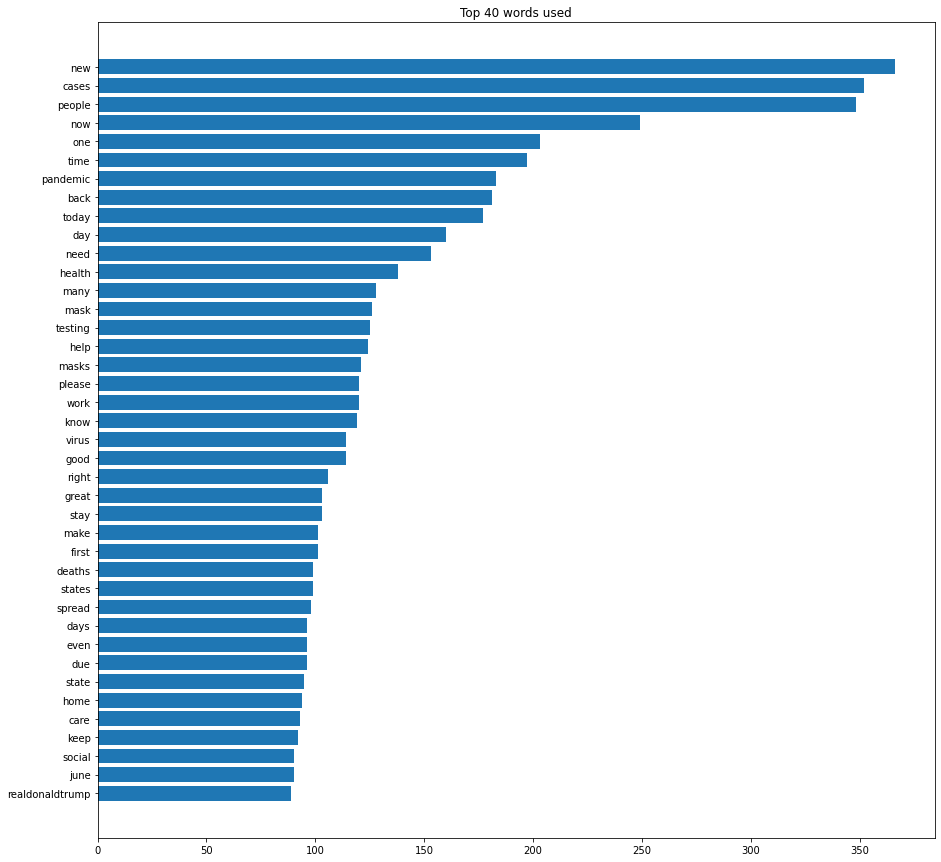

In [745]:
data = sorted(wd.items(), key=lambda x: x[1])[-40:]
x, y = zip(*data)
plt.figure(figsize=(15,15))
plt.title('Top 40 words used')
plt.barh(x, y)

### Running a Sentiment Analysis using VADER from nltk

#### VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity(positive/negative) and intensity of emotion.

In [618]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [619]:
analyzer = SentimentIntensityAnalyzer()

In [555]:
def analyze_text(text):
    result = analyzer.polarity_scores(text)
    return result['compound']

In [556]:
def apply_sentiment(score):
    if score > 0:
        sentiment = 'positive'
    elif score == 0:
        sentiment = 'neutral'
    else:
        sentiment = 'negative'
    
    return sentiment

In [557]:
covid_tweets['Sentiment_score'] = covid_tweets['Text'].apply(analyze_text)

In [558]:
covid_tweets['Sentiment'] = covid_tweets['Sentiment_score'].apply(apply_sentiment)

In [559]:
covid_tweets.head(20)

,Date,Type,Text,Location,Sentiment_score,Sentiment
0,2020-02-01 00:06:52,Original,LoganPaul yo why you hate Asians so much ??,215,-0.6199,negative
1,2020-02-01 00:08:19,Original,"To combat , to DENY entry to foreign nationals...","Salisbury, CT",-0.8298,negative
2,2020-02-01 00:16:11,Original,Why? Why would the market tank over Bullit. Th...,GOD BLESS AMERICA,0.0772,positive
3,2020-02-01 00:31:57,Original,The responsible adult trifecta (1) Get a flu s...,"Boston, MA",-0.0772,negative
4,2020-02-01 00:48:01,Original,We have our 7th confirmed case of in the Unite...,Washington DC,0.6249,positive
5,2020-02-01 00:56:16,Original,"7 56 PM ET. 259 deaths 11,948 cases. And... US...",gloucester Va,0.0000,neutral
6,2020-02-01 01:06:44,Original,I'm buying 2 ton of and investing in Lysol sto...,"Fort Lauderdale, FL",0.0000,neutral
7,2020-02-01 01:07:52,Original,"Just in time for Valentines Day! @ Jackson, Wy...",Touring Musician,0.0000,neutral
8,2020-02-01 01:12:34,Original,This morning I overheard a neighbor say hes wo...,"Cedar Rapids, IA",-0.2960,negative
9,2020-02-01 01:29:02,Original,"A Baton Rouge couple is currently in China, de...","Baton Rouge, LA",0.0000,neutral


In [560]:
group = covid_tweets['Sentiment'].value_counts()

In [561]:
group

negative    1621
neutral     1455
positive    1259
Name: Sentiment, dtype: int64

In [562]:
pos = group.positive
neg = group.negative
neut = group.neutral

In [563]:
total = pos + neut + neg

In [564]:
total2 = pos + neg
total2


2880

In [565]:
sent_score = round((pos - neg) / total2, 3)
sent_score

-0.126

In [566]:
print(f"{'Month':{10}} {'Positive':{10}} {'Negative':{10}} {'Total':{10}} {'S.Score':{10}}")
print(f"{month:{10}} {pos:<{10}} {neg:<{10}} {total2:<{10}} {sent_score:<{10}}")

Month      Positive   Negative   Total      S.Score   
June       1259       1621       2880       -0.126    


In [567]:
neutral = round(neut / total * 100, 3)
neutral

33.564

In [568]:
positive = round(pos / total * 100, 3)
positive

29.043

In [569]:
negative = round(neg / total * 100, 3)
negative

37.393

In [570]:
old_tweets.head()

,Date,Type,Text,Location
0,Fri Jun 12 03:41:22 +0000 2020,Retweet,RT @smallpencilclub: and if ya wanna put all y...,"California, USA"
1,Fri Jun 12 03:41:17 +0000 2020,Original,And @POTUS wants to give you #coronavirus #MAG...,"San Diego, CA"
2,Fri Jun 12 03:41:02 +0000 2020,Retweet,RT @cindievaccaro: Shocker. The government lie...,NaN
3,Fri Jun 12 03:39:44 +0000 2020,Original,COVID-19: Updates for the US #covid19 https://...,NaN
4,Fri Jun 12 03:38:54 +0000 2020,Original,#COVID19 in the #NavajoNation is out of contro...,"Elkins Park, PA"


In [571]:
result =  analyze_text("Anger")

In [572]:
doc = nlp(u"Will")

NameError: name 'nlp' is not defined

In [573]:
for token in doc:
    print(token.text, token.pos_)

NameError: name 'doc' is not defined

In [574]:
sentiment = apply_sentiment(result)

In [575]:
sentiment

'negative'

### NRC Emotions Lexicon (National Research Council of Canada)
#### Using the eight basic emotions


In [576]:
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
                      header=None,
                      sep="\t",
                      names=["Word", "Emotion", "Association"]
                     )

In [1830]:
lexicon.head(50)

,Word,Emotion,Association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [1831]:
anger_words = lexicon[(lexicon['Emotion'] == 'anger') & (lexicon['Association'] == 1)].Word
anticipation_words = lexicon[(lexicon['Emotion'] == 'anticipation') & (lexicon['Association'] == 1)].Word
disgust_words = lexicon[(lexicon['Emotion'] == 'disgust') & (lexicon['Association'] == 1)].Word
fear_words = lexicon[(lexicon['Emotion'] == 'fear') & (lexicon['Association'] == 1)].Word
joy_words = lexicon[(lexicon['Emotion'] == 'joy') & (lexicon['Association'] == 1)].Word
sadness_words = lexicon[(lexicon['Emotion'] == 'sadness') & (lexicon['Association'] == 1)].Word
surprise_words = lexicon[(lexicon['Emotion'] == 'surprise') & (lexicon['Association'] == 1)].Word
trust_words = lexicon[(lexicon['Emotion'] == 'trust') & (lexicon['Association'] == 1)].Word

In [1832]:
anger_words[1:10]

40      abandonment
170           abhor
180       abhorrent
270         abolish
300     abomination
630           abuse
1120       accursed
1130     accusation
1150        accused
Name: Word, dtype: object

In [1833]:
from collections import defaultdict

In [1834]:
ANGER = defaultdict(int)
ANTICIPATION = defaultdict(int)
DISGUST = defaultdict(int)
FEAR = defaultdict(int)
JOY = defaultdict(int)
SADNESS = defaultdict(int)
SURPRISE = defaultdict(int)
TRUST = defaultdict(int)

In [1835]:
for word in anger_words:
    ANGER[word] = 1
    
for word in anticipation_words:
    ANTICIPATION[word] = 1
    
for word in disgust_words:
    DISGUST[word] = 1
    
for word in fear_words:
    FEAR[word] = 1
    
for word in joy_words:
    JOY[word] = 1
    
for word in sadness_words:
    SADNESS[word] = 1
    
for word in surprise_words:
    SURPRISE[word] = 1
    
for word in trust_words:
    TRUST[word] = 1

In [1836]:
scores = {'ANGER':0, 
          'ANTICIPATION':0, 
          'DISGUST':0,
          'FEAR':0,
          'JOY':0,
          'SADNESS':0,
          'SURPRISE':0,
          'TRUST':0,
         }

In [1837]:
for word in all_words.split():
    word  = re.sub(r'[@_!#$%^&*().<>?/\|}{~:]', '', word).strip() # remove special characters
    if stops[word] or len(word) < 3 or not word.isalpha(): #skip missed character and some stop words
        continue
        
    scores['ANGER'] += ANGER[word]
    scores['ANTICIPATION'] += ANTICIPATION[word]
    scores['DISGUST'] += DISGUST[word]
    scores['FEAR'] += FEAR[word]
    scores['JOY'] += JOY[word]
    scores['SADNESS'] += SADNESS[word]
    scores['SURPRISE'] += SURPRISE[word]
    scores['TRUST'] += TRUST[word]
        

In [1838]:
total = scores['ANGER'] + scores['ANTICIPATION'] + scores['DISGUST'] + scores['FEAR'] 
total += scores['JOY'] + scores['SADNESS'] + scores['SURPRISE'] + scores['TRUST']

In [1839]:
total

12417

In [1840]:
sorted_scores = sorted(scores.items(), key=lambda x: -x[1])

In [1841]:
sorted_scores

[('TRUST', 2592),
 ('ANTICIPATION', 2184),
 ('FEAR', 1814),
 ('JOY', 1497),
 ('SADNESS', 1452),
 ('ANGER', 1162),
 ('SURPRISE', 946),
 ('DISGUST', 770)]

In [1842]:
percentage = {}
percentage['ANGER'] = round((scores['ANGER'] / total) * 100,3)
percentage['ANTICIPATION'] = round((scores['ANTICIPATION'] / total) * 100,3)
percentage['DISGUST'] = round((scores['DISGUST'] / total) * 100, 3)
percentage['FEAR'] = round((scores['FEAR'] / total) * 100, 3)
percentage['JOY'] = round((scores['JOY'] / total) * 100, 3)
percentage['SADNESS'] = round((scores['SADNESS'] / total) * 100, 3)
percentage['SURPRISE'] = round((scores['SURPRISE'] / total) * 100, 3)
percentage['TRUST'] = round((scores['TRUST'] / total) * 100, 3)

In [1843]:
sorted_percentage = sorted(percentage.items(), key=lambda x: -x[1])

In [1844]:
sorted_percentage

[('TRUST', 20.875),
 ('ANTICIPATION', 17.589),
 ('FEAR', 14.609),
 ('JOY', 12.056),
 ('SADNESS', 11.694),
 ('ANGER', 9.358),
 ('SURPRISE', 7.619),
 ('DISGUST', 6.201)]

In [1845]:
round(sum(percentage.values()),1) 

100.0

<BarContainer object of 8 artists>

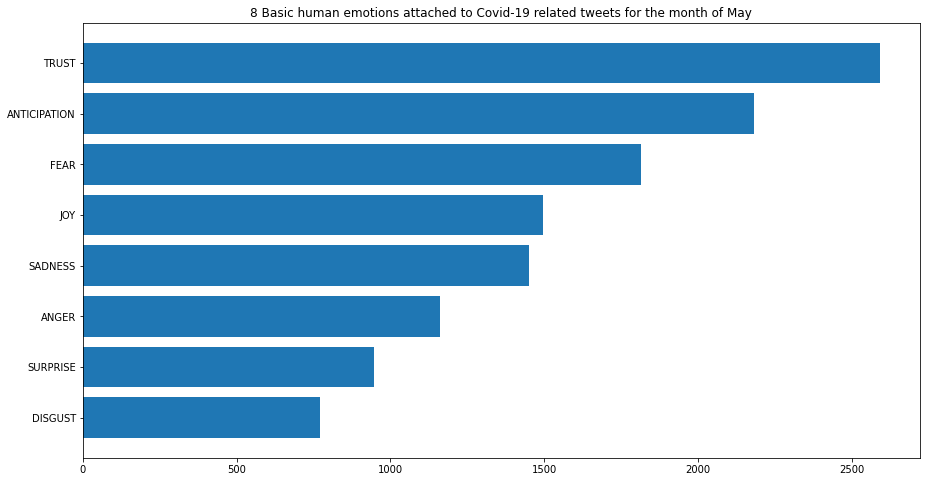

In [1846]:

data = sorted(scores.items(), key=lambda x: x[1])
x, y = zip(*data)
plt.figure(figsize=(15,8))
plt.title(f'8 Basic human emotions attached to Covid-19 related tweets for the month of {month}')
plt.barh(x, y)

### Running a vader analyzer on sentences that contains a keyword

In [1847]:
import spacy

In [1848]:
nlp = spacy.load('en_core_web_md')

In [1849]:
keyword = 'china'

In [1850]:
corpus = ''
for index, tweet in covid_tweets.iterrows():
    text = tweet.Text.strip() + '.'
    if keyword not in text:
        continue
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    text = re.sub(r'[#;"?\(\)/]', '', text)
    text = re.sub(r'[\s]+', ' ', text)
    text = text.strip()
    text = re.sub(r'[.]+', '.', text)
    corpus += text

In [1851]:
print(corpus)

In [1852]:
len(corpus)

0

In [1853]:
#doc = nlp(corpus)

In [1854]:
# corpus = ''
# for sent in doc.sents:
#     if keyword not in sent.text:
#         continue
#     corpus += sent.text
    

In [1855]:
doc = nlp(corpus)

In [1856]:
sentiments = {}
sentiments['positive'] = 0
sentiments['negative'] = 0
sentiments['neutral'] = 0

In [1857]:
for sent in doc.sents:
    score = analyze_text(sent.text)
    sentiment = apply_sentiment(score)
    sentiments[sentiment] += 1
    print('\n')
    print(sent)

In [1858]:
print(covid_tweets.loc[2000, ['Text']])

Text    RepRutherfordFL How do we hold the GOP respons...
Name: 2000, dtype: object


In [1859]:
print(sentiments)

{'positive': 0, 'negative': 0, 'neutral': 0}


### Running Emotional Lexicon on tweets that contains the keyword

In [1860]:
scores = {'ANGER':0, 
          'ANTICIPATION':0, 
          'DISGUST':0,
          'FEAR':0,
          'JOY':0,
          'SADNESS':0,
          'SURPRISE':0,
          'TRUST':0,
         }

In [1861]:
for word in corpus.split():
    word  = re.sub(r'[@_!#$%^&*().<>?/\|}{~:]', '', word).strip() # remove special characters
    if stops[word] or len(word) < 3 or not word.isalpha(): #skip missed character and some stop words
        continue
        
    scores['ANGER'] += ANGER[word]
    scores['ANTICIPATION'] += ANTICIPATION[word]
    scores['DISGUST'] += DISGUST[word]
    scores['FEAR'] += FEAR[word]
    scores['JOY'] += JOY[word]
    scores['SADNESS'] += SADNESS[word]
    scores['SURPRISE'] += SURPRISE[word]
    scores['TRUST'] += TRUST[word]
        

In [1862]:
total = scores['ANGER'] + scores['ANTICIPATION'] + scores['DISGUST'] + scores['FEAR'] 
total += scores['JOY'] + scores['SADNESS'] + scores['SURPRISE'] + scores['TRUST']

In [1863]:
total

0

In [1864]:
sorted_scores = sorted(scores.items(), key=lambda x: -x[1])

In [1865]:
sorted_scores

[('ANGER', 0),
 ('ANTICIPATION', 0),
 ('DISGUST', 0),
 ('FEAR', 0),
 ('JOY', 0),
 ('SADNESS', 0),
 ('SURPRISE', 0),
 ('TRUST', 0)]

In [1866]:
percentage = {}
percentage['ANGER'] = round((scores['ANGER'] / total) * 100,3)
percentage['ANTICIPATION'] = round((scores['ANTICIPATION'] / total) * 100,3)
percentage['DISGUST'] = round((scores['DISGUST'] / total) * 100, 3)
percentage['FEAR'] = round((scores['FEAR'] / total) * 100, 3)
percentage['JOY'] = round((scores['JOY'] / total) * 100, 3)
percentage['SADNESS'] = round((scores['SADNESS'] / total) * 100, 3)
percentage['SURPRISE'] = round((scores['SURPRISE'] / total) * 100, 3)
percentage['TRUST'] = round((scores['TRUST'] / total) * 100, 3)

ZeroDivisionError: division by zero

In [ ]:
sorted_percentage = sorted(percentage.items(), key=lambda x: -x[1])

In [ ]:
sorted_percentage

In [ ]:
round(sum(percentage.values()),1) 

In [ ]:
data = sorted(scores.items(), key=lambda x: x[1])
x, y = zip(*data)
plt.figure(figsize=(15,8))
plt.title(f'8 Basic human emotions attached to Covid-19 related tweets for the month of {month} with tweet matching "{keyword}"')
plt.barh(x, y)

In [1867]:
newyork_tweets = covid_tweets[ covid_tweets['Location'].str.contains("NYC") |
                             covid_tweets['Location'].str.contains("Newyork") |  
                             covid_tweets['Location'].str.contains("New-york") |
                             covid_tweets['Location'].str.contains("york")    
                             ]

In [1868]:
len(newyork_tweets)

49

In [1869]:
newyork_tweets

,Date,Type,Text,Location,Sentiment_score,Sentiment
17,2020-05-25 06:52:32,Original,"by @ Strawberry Fields, John Lennon Memorial, ...",NYC,0.0000,neutral
114,2020-05-25 12:16:48,Original,Bring on the BBQ..... Happy Memorial Day!!,"Lower Manhattan, NYC",0.6467,positive
146,2020-05-25 12:59:39,Original,Take in the irony for a moment that in a few m...,NYC(ish) || LA(ish),-0.1779,negative
212,2020-05-25 14:12:06,Original,"Welcome to this week ProjectLincoln Over 90,00...",NYC | PHL | ATL | SFO,-0.7845,negative
213,2020-05-25 14:13:23,Original,"Deer In The Headlights JoeBiden A weak, paraly...",NYC | PHL | ATL | SFO,-0.8074,negative
224,2020-05-25 14:25:00,Original,for rod_watches_jewerly audemarspiguet Leave y...,NYC,-0.4588,negative
354,2020-05-25 16:13:54,Original,My CRISTI LUCAS LEONARDO Crossing the w the af...,new york city lover,0.0000,neutral
569,2020-05-25 19:21:14,Original,Its so nice when a colleague cares for me and ...,new york,0.7264,positive
631,2020-05-25 20:40:18,Original,profgalloway Not me! Bad enough when the virus...,NYC,0.4840,positive
651,2020-05-25 21:01:31,Original,"of the @ Manhattan, New York",NYC,0.0000,neutral


In [1870]:
group = newyork_tweets['Sentiment'].value_counts()

In [1871]:
group

neutral     21
positive    17
negative    11
Name: Sentiment, dtype: int64

In [1872]:
pos = group.positive
neg = group.negative
neut = group.neutral

In [1873]:
total = pos + neut + neg

In [1874]:
neutral = round(neut / total * 100, 3)
neutral

42.857

In [1875]:
positive = round(pos / total * 100, 3)
positive

34.694

In [1876]:
negative = round(neg / total * 100, 3)
negative

22.449

In [1884]:
all_newyork_words = ''
for index, row in newyork_tweets.iterrows():
    tokens = row.Text.lower().split()
    all_newyork_words += ' '.join(tokens)
   

In [1885]:
stopwords = list(STOPWORDS) + ['coronavirus', '' 'covid19','amp' 'ha', 'the', 'thi', 'was', 'is','hi', 'Covid19', 'Covid-19','will']
stopwords = set(stopwords)
wordcloud3 = WordCloud(width=800, 
                      height=800,
                      stopwords=stopwords,
                      max_words=150,
                      background_color='white', 
                      min_font_size=10).generate(all_newyork_words)


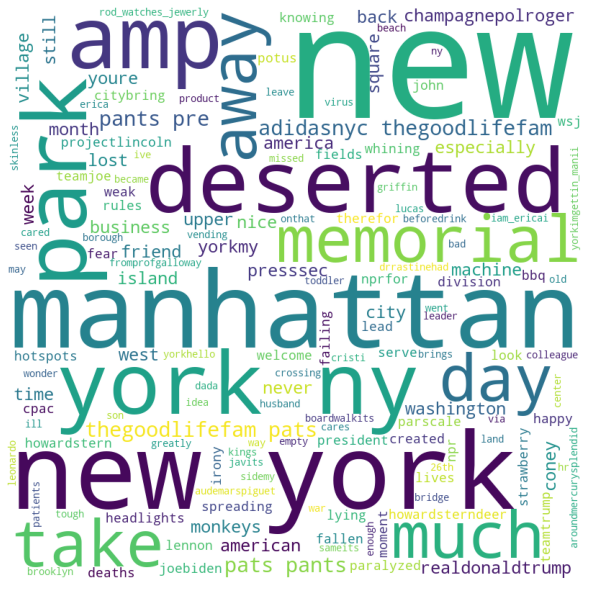

In [1886]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [1887]:
scores = {'ANGER':0, 
          'ANTICIPATION':0, 
          'DISGUST':0,
          'FEAR':0,
          'JOY':0,
          'SADNESS':0,
          'SURPRISE':0,
          'TRUST':0,
         }

In [1888]:
for word in all_newyork_words.split():
    word  = re.sub(r'[@_!#$%^&*().<>?/\|}{~:]', '', word).strip() # remove special characters
    if stops[word] or len(word) < 3 or not word.isalpha(): #skip missed character and some stop words
        continue
        
    scores['ANGER'] += ANGER[word]
    scores['ANTICIPATION'] += ANTICIPATION[word]
    scores['DISGUST'] += DISGUST[word]
    scores['FEAR'] += FEAR[word]
    scores['JOY'] += JOY[word]
    scores['SADNESS'] += SADNESS[word]
    scores['SURPRISE'] += SURPRISE[word]
    scores['TRUST'] += TRUST[word]
        

In [1889]:
total = scores['ANGER'] + scores['ANTICIPATION'] + scores['DISGUST'] + scores['FEAR'] 
total += scores['JOY'] + scores['SADNESS'] + scores['SURPRISE'] + scores['TRUST']

In [1890]:
total

90

In [1891]:
sorted_scores = sorted(scores.items(), key=lambda x: -x[1])

In [1892]:
sorted_scores

[('SADNESS', 17),
 ('FEAR', 15),
 ('TRUST', 13),
 ('ANTICIPATION', 12),
 ('DISGUST', 11),
 ('ANGER', 10),
 ('JOY', 8),
 ('SURPRISE', 4)]

In [1893]:
percentage = {}
percentage['ANGER'] = round((scores['ANGER'] / total) * 100,3)
percentage['ANTICIPATION'] = round((scores['ANTICIPATION'] / total) * 100,3)
percentage['DISGUST'] = round((scores['DISGUST'] / total) * 100, 3)
percentage['FEAR'] = round((scores['FEAR'] / total) * 100, 3)
percentage['JOY'] = round((scores['JOY'] / total) * 100, 3)
percentage['SADNESS'] = round((scores['SADNESS'] / total) * 100, 3)
percentage['SURPRISE'] = round((scores['SURPRISE'] / total) * 100, 3)
percentage['TRUST'] = round((scores['TRUST'] / total) * 100, 3)

In [1894]:
sorted_percentage = sorted(percentage.items(), key=lambda x: -x[1])

In [1895]:
sorted_percentage

[('SADNESS', 18.889),
 ('FEAR', 16.667),
 ('TRUST', 14.444),
 ('ANTICIPATION', 13.333),
 ('DISGUST', 12.222),
 ('ANGER', 11.111),
 ('JOY', 8.889),
 ('SURPRISE', 4.444)]

In [1896]:
round(sum(percentage.values()),1) 

100.0

<BarContainer object of 8 artists>

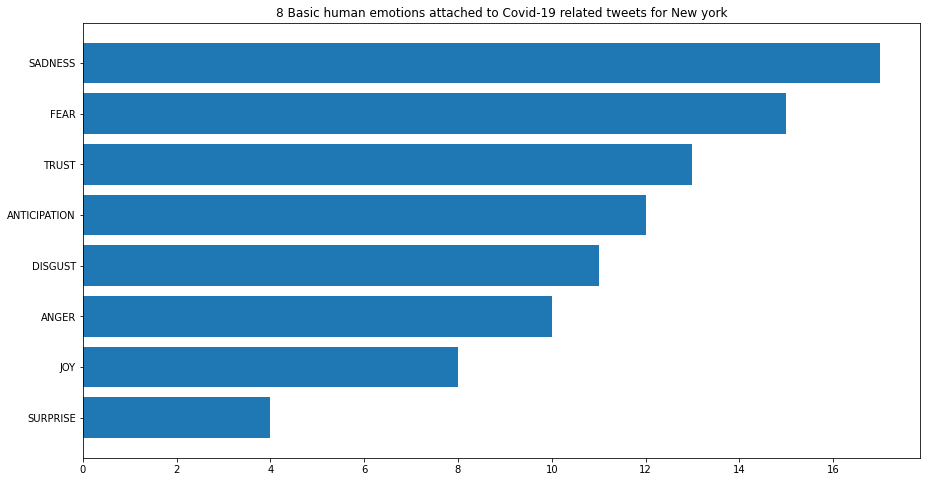

In [1897]:
data = sorted(scores.items(), key=lambda x: x[1])
x, y = zip(*data)
plt.figure(figsize=(15,8))
plt.title(f'8 Basic human emotions attached to Covid-19 related tweets for New york')
plt.barh(x, y)